In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('customer_churn_data.csv')
df

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes
...,...,...,...,...,...,...,...,...,...,...
995,996,42,Male,41,37.14,Month-to-Month,Fiber Optic,1522.74,Yes,Yes
996,997,62,Male,9,80.93,Month-to-Month,NaN,728.37,No,Yes
997,998,51,Female,15,111.72,Month-to-Month,Fiber Optic,1675.80,Yes,Yes
998,999,39,Male,68,65.67,One-Year,NaN,4465.56,No,Yes


In [3]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes


In [4]:
df.dtypes

CustomerID           int64
Age                  int64
Gender              object
Tenure               int64
MonthlyCharges     float64
ContractType        object
InternetService     object
TotalCharges       float64
TechSupport         object
Churn               object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


In [6]:
df.isna().sum().sum()

np.int64(297)

In [7]:
df['InternetService'] = df['InternetService'].fillna('')

In [8]:
df.isna().sum()

CustomerID         0
Age                0
Gender             0
Tenure             0
MonthlyCharges     0
ContractType       0
InternetService    0
TotalCharges       0
TechSupport        0
Churn              0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


In [11]:
numeric_cols = df.select_dtypes( include= ["number"])

In [12]:
numeric_cols.corr()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
CustomerID,1.000000,0.036730,-0.018585,-0.030504,-0.027490
Age,0.036730,1.000000,0.000472,0.006362,-0.001896
Tenure,-0.018585,0.000472,1.000000,-0.014552,0.894868
MonthlyCharges,-0.030504,0.006362,-0.014552,1.000000,0.304893
TotalCharges,-0.027490,-0.001896,0.894868,0.304893,1.000000


In [13]:
import matplotlib.pyplot as plt

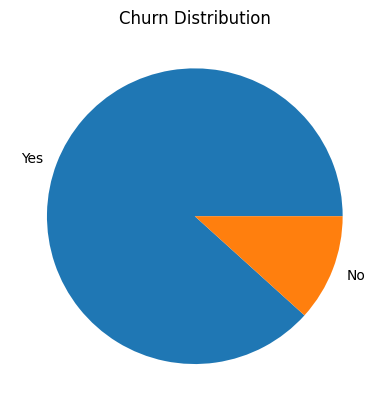

In [14]:
df["Churn"].value_counts().plot(kind= "pie")
plt.title("Churn Distribution")
plt.ylabel("")
plt.show()

In [15]:
df.head(2)

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.4,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.0,Yes,Yes


In [16]:
df.groupby("Churn")["MonthlyCharges"].mean()


Churn
No     62.54641
Yes    75.96077
Name: MonthlyCharges, dtype: float64

Running exploratory data analysis


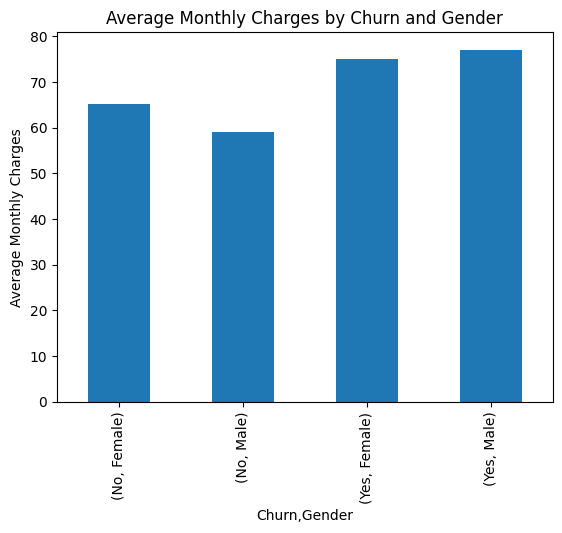

In [17]:
df.groupby(["Churn", "Gender"])["MonthlyCharges"].mean().plot(kind= "bar")
plt.ylabel("Average Monthly Charges")
plt.title("Average Monthly Charges by Churn and Gender")
plt.show()


Text(0.5, 0, 'Monthly Charges')

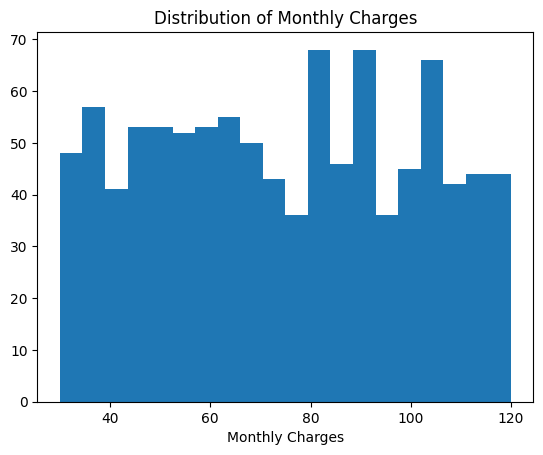

In [18]:
plt.hist(df["MonthlyCharges"], bins=20)
plt.title("Distribution of Monthly Charges")
plt.xlabel("Monthly Charges")

In [19]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'MonthlyCharges',
       'ContractType', 'InternetService', 'TotalCharges', 'TechSupport',
       'Churn'],
      dtype='object')

In [20]:
y = df[["Churn"]]
X = df[["Age","Gender", "Tenure", "MonthlyCharges"]]

In [21]:
X #1 Female 0 Male

,Age,Gender,Tenure,MonthlyCharges
0,49,Male,4,88.35
1,43,Male,0,36.67
2,51,Female,2,63.79
3,60,Female,8,102.34
4,42,Male,32,69.01
...,...,...,...,...
995,42,Male,41,37.14
996,62,Male,9,80.93
997,51,Female,15,111.72
998,39,Male,68,65.67


In [22]:
y

,Churn
0,Yes
1,Yes
2,Yes
3,Yes
4,Yes
...,...
995,Yes
996,Yes
997,Yes
998,Yes


In [23]:
X["Gender"] = X["Gender"].apply(lambda x:1 if x == "Female" else 0)

C:\Users\user\AppData\Local\Temp\ipykernel_14020\3065660116.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Gender"] = X["Gender"].apply(lambda x:1 if x == "Female" else 0)


In [24]:
type(X["Gender"][0])

numpy.int64

In [25]:
y.head(2)

,Churn
0,Yes
1,Yes


In [26]:
y['Churn'] = y['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

C:\Users\user\AppData\Local\Temp\ipykernel_14020\884819502.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Churn'] = y['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)


In [27]:
type(y["Churn"][0])

numpy.int64

In [28]:
y

,Churn
0,1
1,1
2,1
3,1
4,1
...,...
995,1
996,1
997,1
998,1


In [29]:
X

,Age,Gender,Tenure,MonthlyCharges
0,49,0,4,88.35
1,43,0,0,36.67
2,51,1,2,63.79
3,60,1,8,102.34
4,42,0,32,69.01
...,...,...,...,...
995,42,0,41,37.14
996,62,0,9,80.93
997,51,1,15,111.72
998,39,0,68,65.67


In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()

In [33]:
X_train = scaler.fit_transform(X_train)

In [34]:
import joblib
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [35]:
X_test = scaler.fit_transform(X_test)

In [36]:
X_train

array([[-0.27936177, -1.06725697,  2.28080878,  0.92037124],
       [ 0.02664838,  0.93698147,  0.11295321,  1.12221019],
       [-0.38136516, -1.06725697,  0.69457299, -1.00540975],
       ...,
       [ 0.23065515, -1.06725697,  1.91068709,  0.16723494],
       [ 0.02664838,  0.93698147, -0.36291753,  1.6909211 ],
       [-0.38136516,  0.93698147,  0.06007868, -0.87045469]],
      shape=(800, 4))

In [37]:
X_test

array([[ 0.57309103,  0.88640526, -1.03475948,  1.08859098],
       [ 0.98354119,  0.88640526, -0.9281382 ,  1.64456522],
       [-1.88960992, -1.12815215, -0.44834246,  1.59448733],
       [-0.5556469 ,  0.88640526,  0.3513171 ,  1.42707365],
       [-1.17132214, -1.12815215, -0.71489565, -0.70799902],
       [ 0.98354119, -1.12815215, -0.55496374, -0.72773775],
       [-0.96609706,  0.88640526,  0.72449157,  0.95626838],
       [-0.96609706, -1.12815215,  0.29800647, -1.44710481],
       [ 0.67570357, -1.12815215,  0.03145328, -1.57833081],
       [-0.76087198,  0.88640526,  3.33671282,  0.86890622],
       [-0.45303436,  0.88640526, -1.03475948, -1.45478098],
       [ 0.06002834,  0.88640526,  0.19138519, -0.7500352 ],
       [ 0.88092865,  0.88640526, -0.98144884,  0.42807458],
       [-0.65825944,  0.88640526,  0.19138519,  1.47349622],
       [ 0.26525341,  0.88640526, -0.55496374, -1.55201251],
       [-0.86348452, -1.12815215, -0.28841055, -1.0066387 ],
       [ 0.16264088, -1.

In [38]:
from sklearn.metrics import accuracy_score
def modelperformance(predictions):
    print("Accuracy score on model is {}".format(accuracy_score(y_test, predictions)))

In [39]:
from sklearn.model_selection import GridSearchCV

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
log_model = LogisticRegression()

In [44]:
log_model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [45]:
y_pred = log_model.predict(X_test)

In [46]:
modelperformance(y_pred)

Accuracy score on model is 0.885


In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
param_grid = {
    'n_neighbors': [3,5,7,9],
    'weights': ['uniform', 'distance'],
}

In [49]:
gridkn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

In [50]:
gridkn.fit(X_train, y_train)

,estimator,KNeighborsClassifier()
,param_grid,"{'n_neighbors': [3, 5, ...], 'weights': ['uniform', 'distance']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,9


In [51]:
gridkn.best_params_

{'n_neighbors': 9, 'weights': 'distance'}

In [52]:
y_pred = gridkn.predict(X_test)

In [53]:
modelperformance(y_pred)

Accuracy score on model is 0.88


In [54]:
from sklearn.svm import SVC

In [55]:
svm = SVC()

In [56]:
param_grid = {
    "C": [0.01, 0.1, 0.5, 1],
    "kernel": ["linear", "rbf","poly"]
}

In [57]:
gridsvc= GridSearchCV(svm, param_grid, cv = 5,  verbose=2)

In [58]:
gridsvc.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ..............................C=0.01, kernel=linear; total time=   0.0s
[CV] END ..............................C=0.01, kernel=linear; total time=   0.0s
[CV] END ..............................C=0.01, kernel=linear; total time=   0.0s
[CV] END ..............................C=0.01, kernel=linear; total time=   0.0s
[CV] END ..............................C=0.01, kernel=linear; total time=   0.0s
[CV] END .................................C=0.01, kernel=rbf; total time=   0.0s
[CV] END .................................C=0.01, kernel=rbf; total time=   0.0s
[CV] END .................................C=0.01, kernel=rbf; total time=   0.0s
[CV] END .................................C=0.01, kernel=rbf; total time=   0.0s
[CV] END .................................C=0.01, kernel=rbf; total time=   0.0s
[CV] END ................................C=0.01, kernel=poly; total time=   0.0s
[CV] END ................................C=0.01,

,estimator,SVC()
,param_grid,"{'C': [0.01, 0.1, ...], 'kernel': ['linear', 'rbf', ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,0.01


In [59]:
print(gridsvc.best_params_)

{'C': 0.01, 'kernel': 'linear'}


In [61]:
y_pred = gridsvc.predict(X_test)

In [62]:
modelperformance(y_pred)

Accuracy score on model is 0.885


In [64]:
from sklearn.tree import DecisionTreeClassifier

In [65]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [66]:
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv= 5)

In [67]:
grid_tree.fit(X_train, y_train)

,estimator,DecisionTreeClassifier()
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [None, 10, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], ...}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


In [ ]:
grid_tree.best_params__

{'criterion': 'entropy',
 'max_depth': 30,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'splitter': 'random'}

In [ ]:
y_pred = grid_tree.predict(X_test)

In [78]:
modelperformance(y_pred)

Accuracy score on model is 0.845


In [80]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier()

In [81]:
param_grid = {
    'n_estimators':[32,64,128,256],
    'max_features':[2,3,4],
    'bootstrap':[True, False]
}

In [82]:
grid_rfc = GridSearchCV(rfc_model, param_grid, cv=5)

In [83]:
grid_rfc.fit(X_train, y_train)

,estimator,RandomForestClassifier()
,param_grid,"{'bootstrap': [True, False], 'max_features': [2, 3, ...], 'n_estimators': [32, 64, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,32


In [84]:
grid_rfc.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 32}

In [86]:
y_pred = grid_rfc.predict(X_test)

In [87]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [88]:
modelperformance(y_pred)

Accuracy score on model is 0.855


In [91]:
best_model = grid_rfc.best_estimator_

In [92]:
joblib.dump(best_model, 'model.pkl')

['model.pkl']

In [93]:
X.columns

Index(['Age', 'Gender', 'Tenure', 'MonthlyCharges'], dtype='object')